In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
student = pd.read_csv('/kaggle/input/student/StudentPerformanceFactors.csv')

In [3]:

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
student.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
student.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
student.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
for col in student.columns:
    if student[col].dtype == "object":
        student[col].fillna(student[col].mode()[0], inplace=True)
    else:
        student[col].fillna(student[col].median(), inplace=True)

In [8]:

student.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Original shape: (6607, 20)
After removing outliers: (6503, 20)


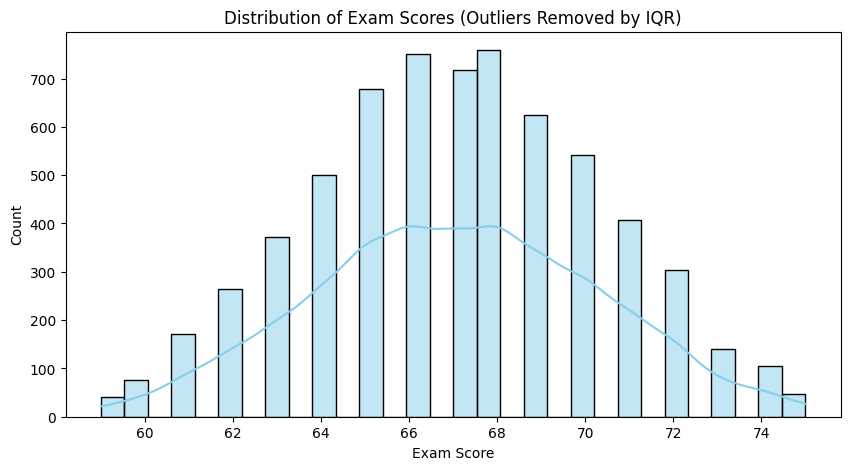

In [10]:
Q1 = student["Exam_Score"].quantile(0.25)
Q3 = student["Exam_Score"].quantile(0.75)
IQR = Q3 - Q1
# Keep only non-outliers
student_no_outliers = student[(student["Exam_Score"] >= Q1 - 1.5*IQR) &
                    (student["Exam_Score"] <= Q3 + 1.5*IQR)]
print("Original shape:", student.shape)
print("After removing outliers:", student_no_outliers.shape)
plt.figure(figsize=(10,5))
sns.histplot(student_no_outliers["Exam_Score"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Exam Scores (Outliers Removed by IQR)")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

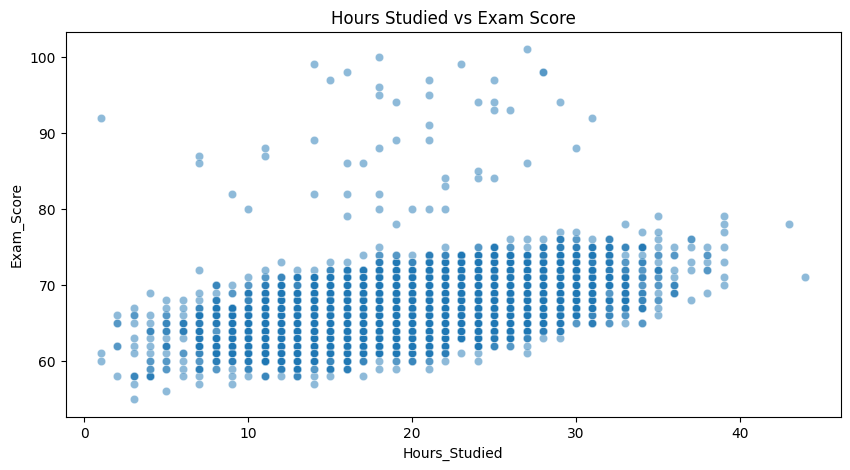

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=student, x="Hours_Studied", y="Exam_Score", alpha=0.5)
plt.title("Hours Studied vs Exam Score")
plt.show()

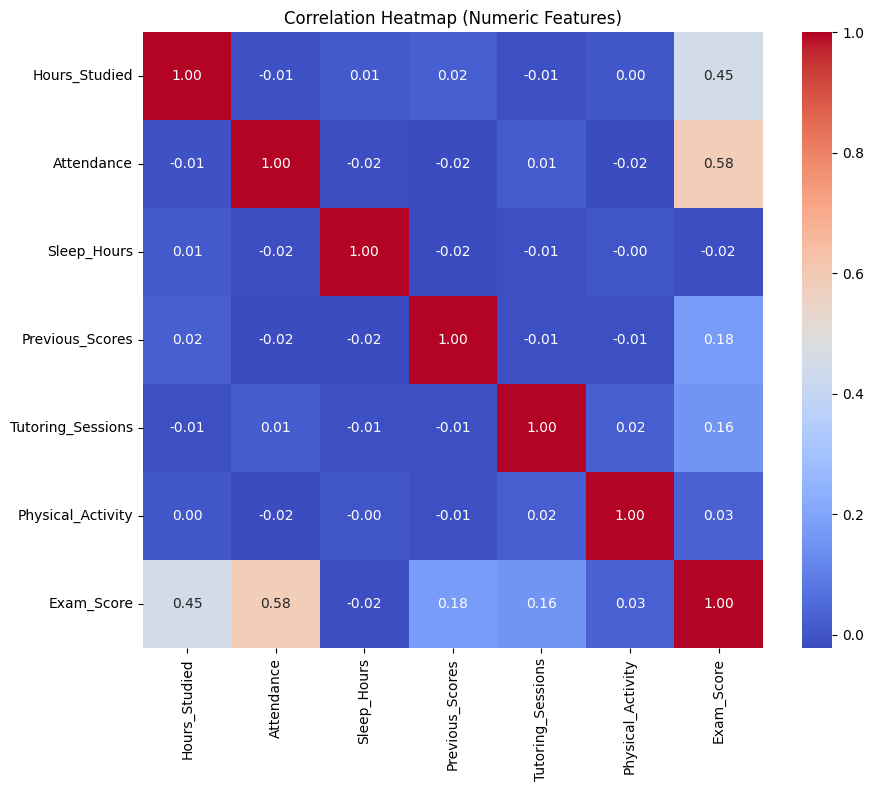

In [12]:
plt.figure(figsize=(10,8))
numeric_student = student.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_student.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

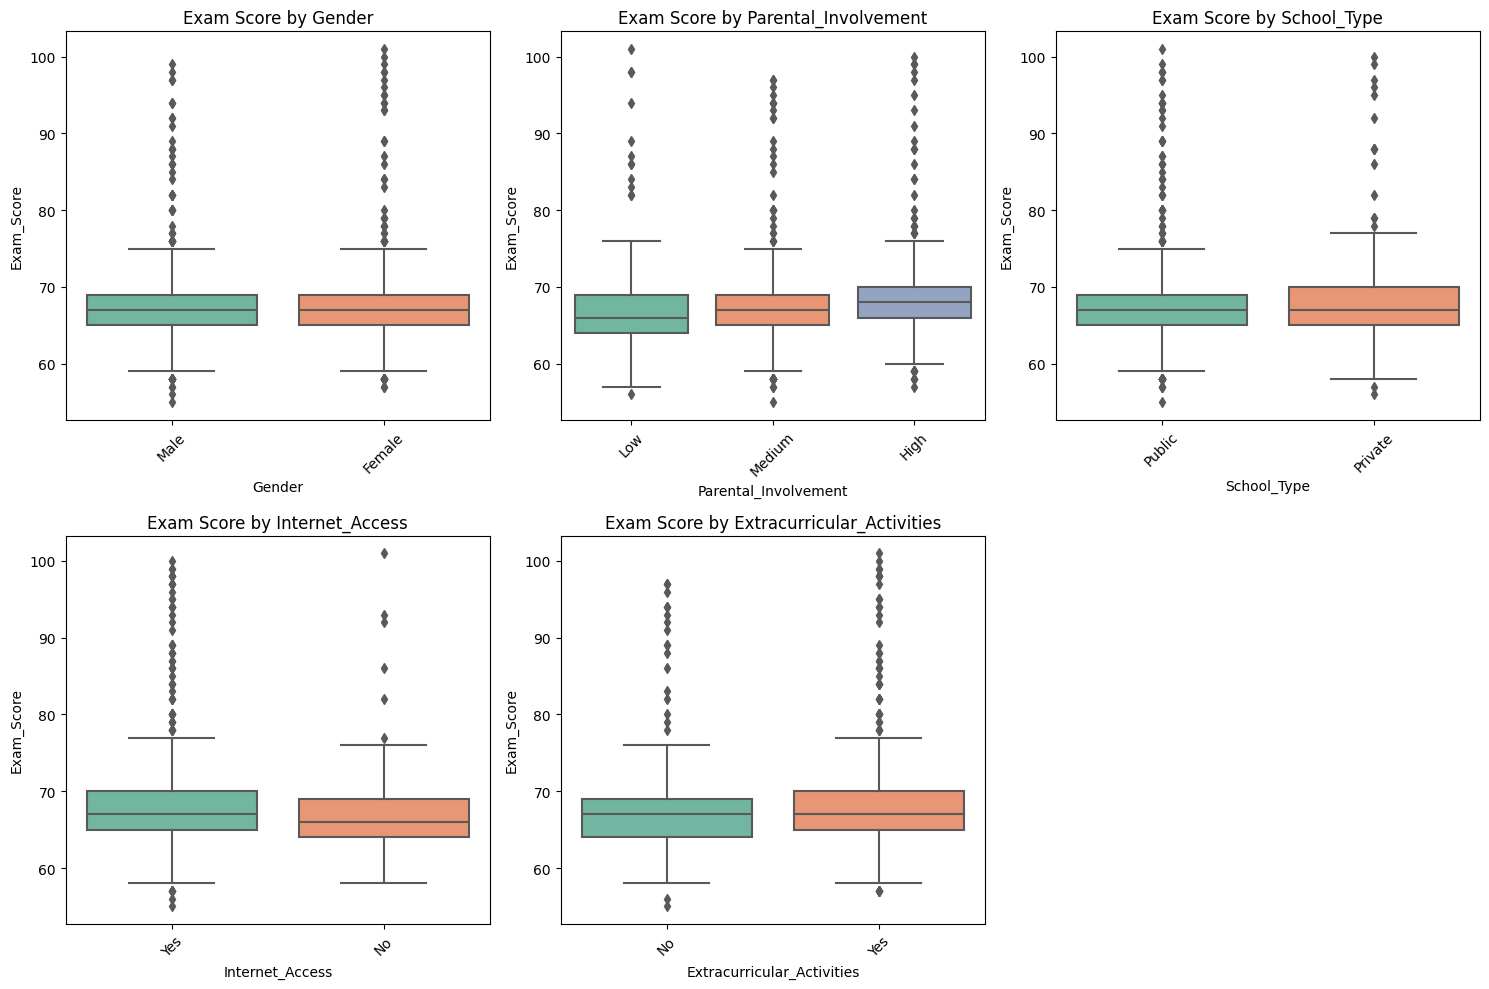

In [13]:
categorical_cols = ["Gender", "Parental_Involvement", "School_Type","Internet_Access", "Extracurricular_Activities"]
n = len(categorical_cols)
rows = (n + 2) // 3
cols = 3
plt.figure(figsize=(5*cols, 5*rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=col, y="Exam_Score", data=student, palette="Set2")
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


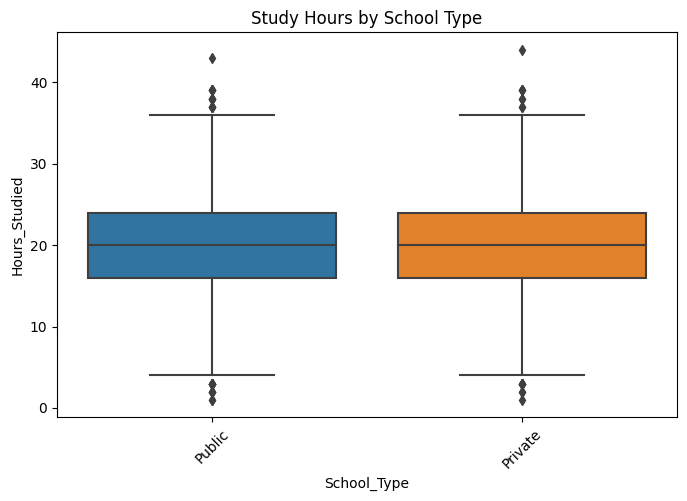

In [16]:

plt.figure(figsize=(8,5))
sns.boxplot(x="School_Type", y="Hours_Studied", data=student)
plt.title("Study Hours by School Type")
plt.xticks(rotation=45)
plt.show()

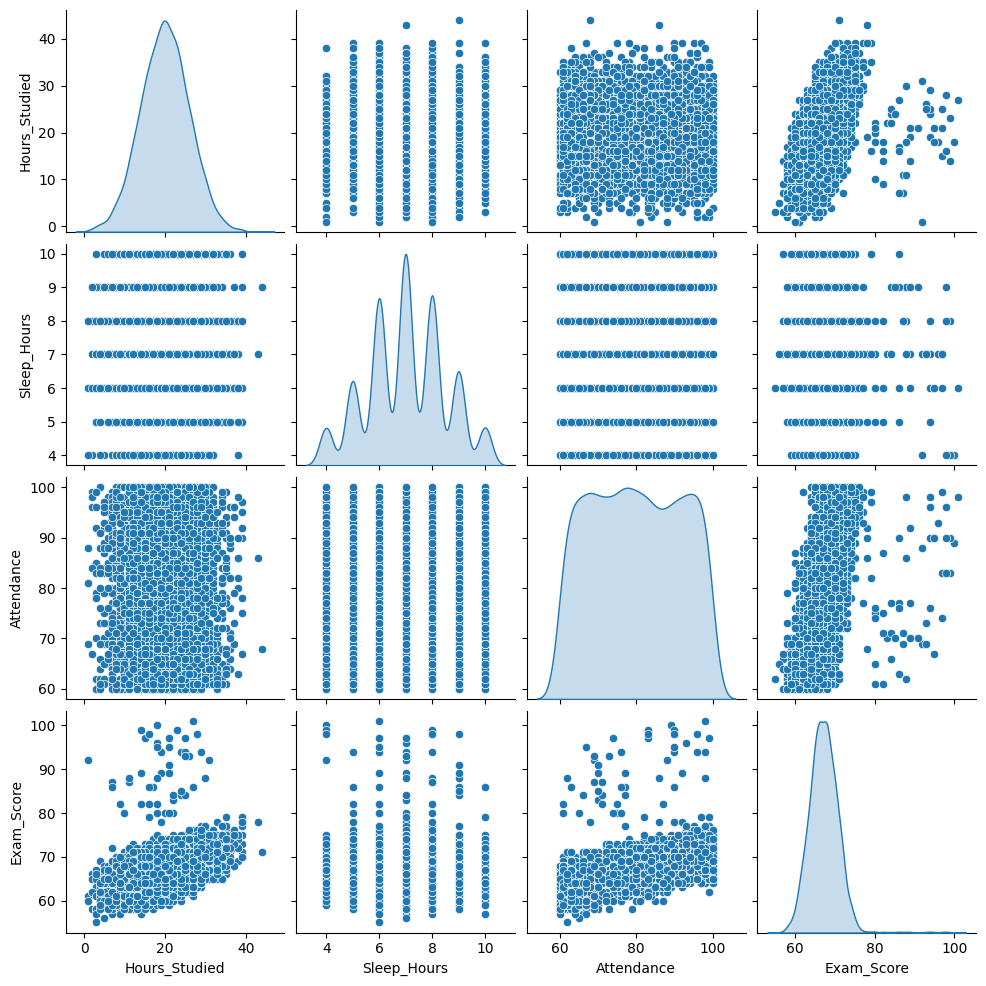

In [17]:

sns.pairplot(student[["Hours_Studied", "Sleep_Hours", "Attendance", "Exam_Score"]], diag_kind="kde")
plt.show()

In [20]:


X = student_no_outliers.drop("Exam_Score", axis=1)
y = student_no_outliers["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [21]:
num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(exclude=np.number).columns

X_train_num = X_train[num_features]
X_test_num  = X_test[num_features]

X_train_cat = X_train[cat_features]
X_test_cat  = X_test[cat_features]

# --- Encode Categorical ---
encoder = OneHotEncoder(drop="first", handle_unknown="ignore")
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc  = encoder.transform(X_test_cat)
# --- Scale Numeric ---
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled  = scaler.transform(X_test_num)

print("Means after scaling:", np.mean(X_train_num_scaled, axis=0))
print("Stds  after scaling:", np.std(X_train_num_scaled, axis=0, ddof=0))

# --- Concatenate Back ---
X_train_final = np.hstack([X_train_num_scaled, X_train_cat_enc.toarray()]) # Convert sparse matrix to dense array
X_test_final  = np.hstack([X_test_num_scaled, X_test_cat_enc.toarray()])   # Convert sparse matrix to dense array

print("Final Train Shape:", X_train_final.shape)
print("Final Test Shape :", X_test_final.shape)
     

Means after scaling: [ 3.34646233e-17 -4.60309308e-16 -2.45179587e-16  1.25663075e-16
  6.00997316e-17  1.59127698e-16]
Stds  after scaling: [1. 1. 1. 1. 1. 1.]
Final Train Shape: (5202, 27)
Final Test Shape : (1301, 27)


In [22]:
reg = LinearRegression()
reg.fit(X_train_final, y_train)

# Predict
y_pred = reg.predict(X_train_final)

# Evaluation
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.27351061832350143
RMSE: 0.32594738351491326
R²: 0.9899569049376326


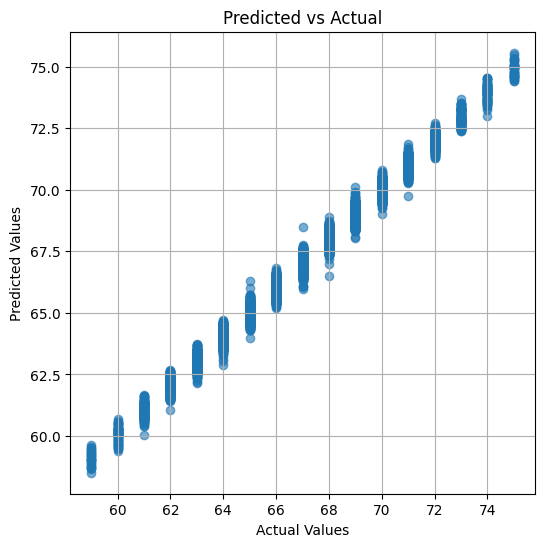

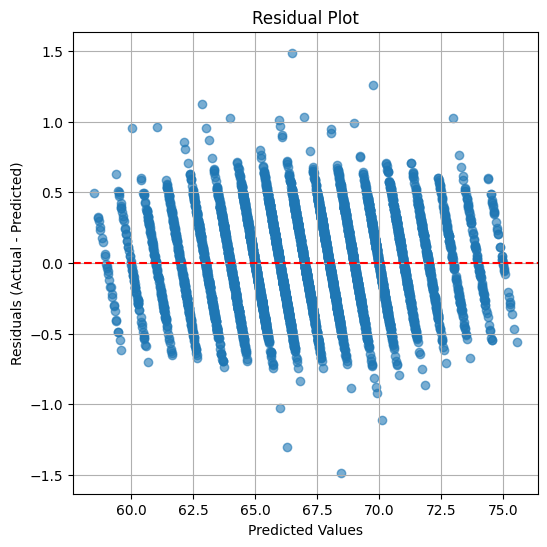

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

# --- 2. Residual Plot ---
residuals = y_train - y_pred
plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
     

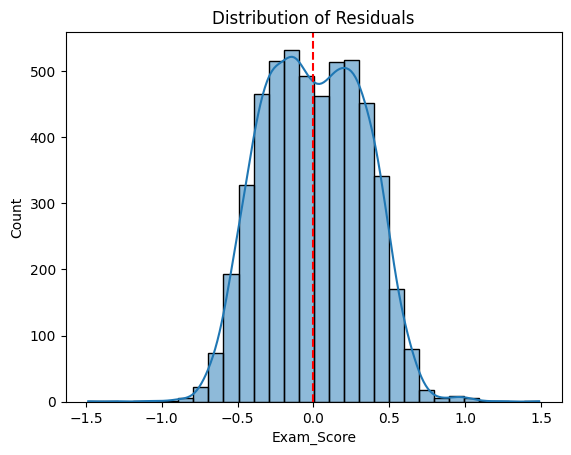

In [24]:

sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Residuals")
plt.show()

In [26]:
# Polynomial Regression (Bonus)

numeric_features = X_train.select_dtypes(include="number").columns
categorical_features = X_train.select_dtypes(include="object").columns

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features)
])

# Full pipeline: preprocessing + polynomial features + model
poly_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),  # Apply PolynomialFeatures after preprocessing
    ("model", LinearRegression())
])

# --- Train Polynomial Regression ---
poly_pipeline.fit(X_train, y_train)

# --- Predictions ---
y_pred_poly = poly_pipeline.predict(X_train)

# --- Metrics ---
mse_poly = mean_squared_error(y_train, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_train, y_pred_poly)
r2_poly = r2_score(y_train, y_pred_poly)

print("Polynomial Regression (Degree=2)")
print(f"MAE : {mae_poly:.3f}")
print(f"MSE : {mse_poly:.3f}")
print(f"RMSE: {rmse_poly:.3f}")
print(f"R²  : {r2_poly:.3f}")


Polynomial Regression (Degree=2)
MAE : 0.262
MSE : 0.099
RMSE: 0.315
R²  : 0.991


In [27]:

print("Model Comparison")
print("-------------------------------")
print(f"Linear Regression -> R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
print(f"Polynomial (deg=2) -> R²: {r2_poly:.3f}, RMSE: {rmse_poly:.3f}, MAE: {mae_poly:.3f}")

Model Comparison
-------------------------------
Linear Regression -> R²: 0.990, RMSE: 0.326, MAE: 0.274
Polynomial (deg=2) -> R²: 0.991, RMSE: 0.315, MAE: 0.262


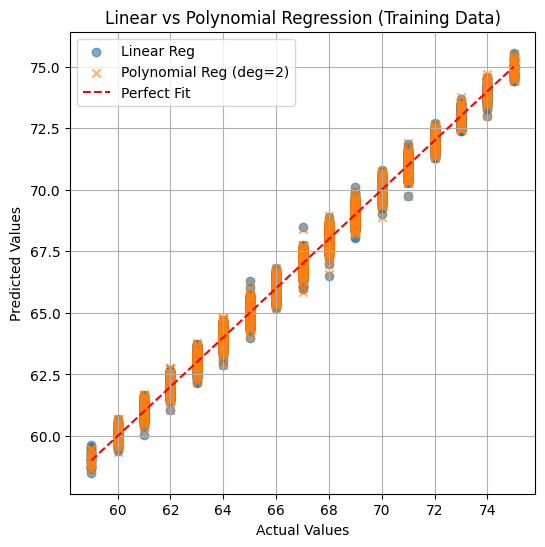

In [28]:
plt.figure(figsize=(6, 6))

# Linear regression predictions on the test set
y_pred_test_linear = reg.predict(X_test_final)

# Polynomial regression predictions on the test set
y_pred_test_poly = poly_pipeline.predict(X_test)

# Linear regression predictions on the training set
plt.scatter(y_train, y_pred, alpha=0.6, label="Linear Reg")

# Polynomial regression predictions on the training set
plt.scatter(y_train, y_pred_poly, alpha=0.6, label="Polynomial Reg (deg=2)", marker="x")

plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()],"r--", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear vs Polynomial Regression (Training Data)")
plt.legend()
plt.grid(True)
plt.show()